
# **GRIP: The Sparks Foundation**


##GRIPDECEMBER22 
Author: Shaziya Shaikh (Data Science and Business Intelligence Intern)

**Problem Statement**: Perform 'Exploratory Data Analysis' on 'Global Terrorism'.

In [1]:
#Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [6]:
# import Data set
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding ="ISO-8859-1")

In [7]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [8]:
print("There are {} rows and {} columns in the dataset".format(df.shape[0],df.shape[1]))

There are 5096 rows and 135 columns in the dataset


In [9]:
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [10]:
no_of_cols= df.columns.nunique()
print("there are total %d columns in the data "%no_of_cols)

there are total 135 columns in the data 


In [11]:
# rename columns
df.rename(columns = {
    'latitude': 'lat',
    'longitude': 'lon',
    'iyear': 'year',
    'country_txt': 'Country',
    'region_txt': 'Region',
    'provstate': 'state',
    'attacktype1_txt': 'attacktype',
    'targtype1_txt': 'targettype',
    'weaptype1_txt': 'weapontype',
    'nperps': 'nter',
    'nkill': 'nkilled',
    'nkillter': 'nkilledter',
    'nwound': 'nwounded',
    'nwoundte': 'nwoundedter',
    'propextent_txt': 'propertyextent'
},inplace=True)

In [12]:
df.columns.values

array(['eventid', 'year', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region', 'Region', 'state',
       'city', 'lat', 'lon', 'specificity', 'vicinity', 'location',
       'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative',
       'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'targtype1', 'targettype', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt',
       'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3',
       'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3',
       'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2',
       'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1',
       'guncertain2', 'guncertain3', 'individual', 'nter', 'nperpcap',
       '

In [13]:
# create new column with name Casualities
df['Casualities'] = df.nkilled + df.nwounded

In [14]:
# Select some imporant columns from df.
terror = df.apply(lambda x: x.encode('utf-8').strip() if isinstance(x, str) else x)
terror=df[['year','extended','Country','Region','state','city','lat','lon',
           'multiple','success','suicide','attacktype','targettype','gname','nter'
           ,'claimed','weapontype','nkilled','nkillus','nwounded','nwoundus','Casualities','property',
           'propertyextent']]

terror

,year,extended,Country,Region,state,city,lat,lon,multiple,success,...,nter,claimed,weapontype,nkilled,nkillus,nwounded,nwoundus,Casualities,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0,1,...,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,1.0,0.0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,0.0,0.0,NaN
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,1.0,0.0,NaN
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,1977,0,Turkey,Middle East & North Africa,Hatay,Iskenderun,36.582505,36.165428,0,1,...,NaN,NaN,Explosives,0.0,0.0,0.0,0.0,0.0,1.0,Unknown
5092,1977,0,Turkey,Middle East & North Africa,Hatay,Iskendrun,36.582505,36.165428,0,1,...,NaN,NaN,Explosives,0.0,0.0,0.0,NaN,0.0,1.0,Minor (likely < $1 million)
5093,1977,0,Turkey,Middle East & North Africa,Adana,Adana,37.001163,35.331687,0,1,...,NaN,NaN,Explosives,0.0,0.0,0.0,0.0,0.0,1.0,NaN
5094,1977,0,United States,North America,Tennessee,Chattanooga,35.046440,-85.309464,0,1,...,1.0,0.0,Explosives,0.0,0.0,0.0,0.0,0.0,1.0,Minor (likely < $1 million)


In [15]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            5096 non-null   int64  
 1   extended        5096 non-null   int64  
 2   Country         5096 non-null   object 
 3   Region          5096 non-null   object 
 4   state           5083 non-null   object 
 5   city            5096 non-null   object 
 6   lat             5006 non-null   float64
 7   lon             5006 non-null   float64
 8   multiple        5096 non-null   int64  
 9   success         5096 non-null   int64  
 10  suicide         5096 non-null   int64  
 11  attacktype      5096 non-null   object 
 12  targettype      5095 non-null   object 
 13  gname           5095 non-null   object 
 14  nter            1345 non-null   float64
 15  claimed         802 non-null    float64
 16  weapontype      5095 non-null   object 
 17  nkilled         4484 non-null   f

In [16]:
# Removing unknown values in the coordinates
terror = terror[pd.notnull(terror.lat)]
df_terrorism = terror[pd.notnull(terror.lon)]
print("Unknown values in the coordinates are removed succcessfully")

Unknown values in the coordinates are removed succcessfully


In [17]:
# Unknowns in numeric columns
exclude_cols = ['year', 'lat', 'lon']
float_cols = [c for c in terror.select_dtypes(include=[float]).columns.tolist() if c not in exclude_cols]

In [18]:
terror[float_cols] = terror[float_cols].fillna(0).astype(int)
terror[float_cols] = terror[float_cols].mask(terror[float_cols] < 0, 0)

In [19]:
# Unknowns in string columns
str_cols = terror.select_dtypes(exclude=[float]).columns.tolist()
terror[str_cols] = terror[str_cols].fillna('Unknown')
# Many fields are dots which mean unknown value
terror[str_cols] = terror[str_cols].replace(r'^\.*$', 'Unknown', regex=True)

In [20]:
terror.shape

(5006, 24)

In [21]:
terror['weapontype'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other'], dtype=object)

In [22]:
terror['propertyextent'].unique()

array(['Unknown', 'Minor (likely < $1 million)',
       'Major (likely >= $1 million but < $1 billion)'], dtype=object)

In [23]:
# Limit Long strings
df_terrorism['weapontype'] = df_terrorism['weapontype'].replace(u'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Minor (likely < $1 million)', u'Minor (< $1 million)')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Major (likely > $1 million but < $1 billion)', u'Major (< $1 billion)')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Catastrophic (likely > $1 billion)', u'Catastrophic (> $1 billion)')

In [24]:
# Number of duplicates values
terror.duplicated().sum()

919

In [25]:
# Removal of duplicates values
terror.drop_duplicates(keep=False,inplace=True)

In [26]:
# No more null values
terror.isnull().sum()

year              0
extended          0
Country           0
Region            0
state             0
city              0
lat               0
lon               0
multiple          0
success           0
suicide           0
attacktype        0
targettype        0
gname             0
nter              0
claimed           0
weapontype        0
nkilled           0
nkillus           0
nwounded          0
nwoundus          0
Casualities       0
property          0
propertyextent    0
dtype: int64

In [27]:
terror.shape

(3676, 24)

In [28]:
terror.nunique()

year                 8
extended             2
Country             88
Region              11
state              359
city               997
lat               1054
lon               1056
multiple             2
success              2
suicide              1
attacktype          10
targettype          22
gname              328
nter                25
claimed              2
weapontype          11
nkilled             31
nkillus              9
nwounded            51
nwoundus            17
Casualities         59
property             2
propertyextent       3
dtype: int64

In [29]:
# Count of each year in the Data Frame
terror["year"].value_counts()

1976    671
1975    547
1977    529
1970    514
1974    414
1971    361
1973    344
1972    296
Name: year, dtype: int64

In [30]:
## Total count of Region in the DataFrame
terror['Region'].value_counts()

Western Europe                 1776
North America                  1000
South America                   356
Middle East & North Africa      315
Central America & Caribbean      86
Southeast Asia                   44
Sub-Saharan Africa               42
East Asia                        20
Eastern Europe                   16
South Asia                       14
Australasia & Oceania             7
Name: Region, dtype: int64

In [31]:
# Total count of gname in the DataFrame
terror['gname'].value_counts()

Unknown                                911
Irish Republican Army (IRA)            411
Left-Wing Militants                    135
Ulster Volunteer Force (UVF)           100
Basque Fatherland and Freedom (ETA)     89
                                      ... 
Portuguese Liberation Army               1
League of the 18                         1
Coup plotters                            1
Iranian extremists                       1
MANO-D                                   1
Name: gname, Length: 328, dtype: int64

In [32]:
# Total count of cities in the DataFrame
terror['city'].value_counts()

Belfast          213
New York City    161
Buenos Aires     112
Paris             92
Rome              90
                ... 
Macon              1
Romainville        1
Ballyronan         1
Edenbridge         1
Iskendrun          1
Name: city, Length: 997, dtype: int64

In [33]:
# Total count of Attack type in the DataFrame
terror['attacktype'].value_counts()

Bombing/Explosion                      1733
Assassination                           610
Armed Assault                           518
Facility/Infrastructure Attack          471
Hostage Taking (Kidnapping)             214
Hijacking                                48
Hostage Taking (Barricade Incident)      42
Unknown                                  27
Unarmed Assault                          12
Hostage Taking (Kid                       1
Name: attacktype, dtype: int64

**Visualisation**

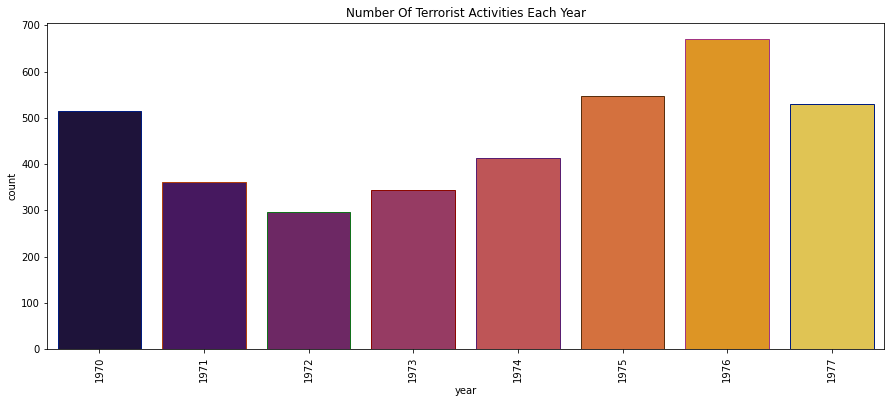

In [34]:
# Count plot on number of terrorist Activities each year.
plt.subplots(figsize=(15,6))
sns.countplot('year',data=terror,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

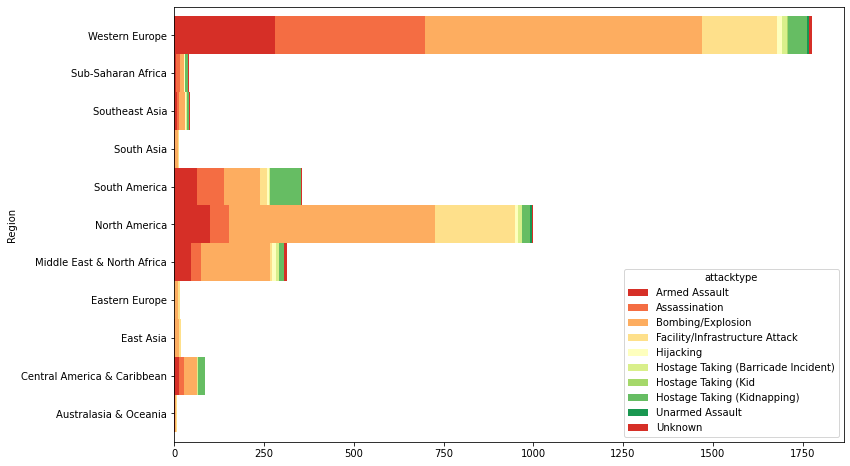

In [35]:
# Attack type in each region
pd.crosstab(terror.Region,terror.attacktype).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

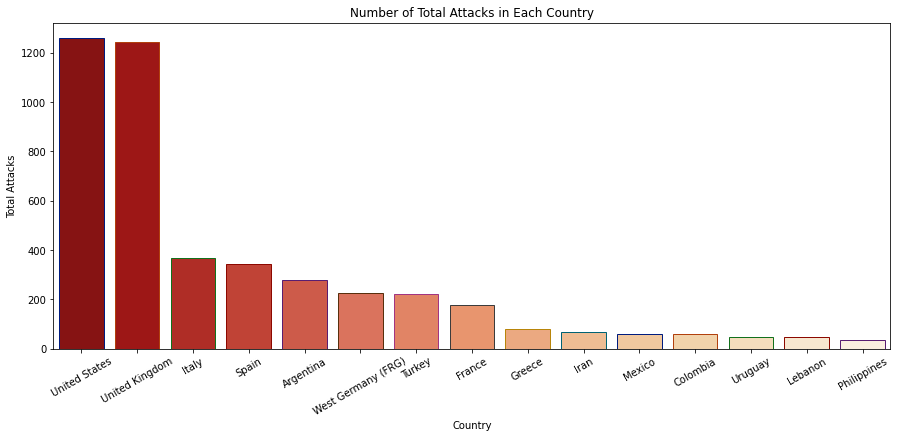

In [36]:
# bar plt on Total Number of attack in each Country
plt.subplots(figsize=(15,6))
country_attacks = df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Attacks in Each Country')
plt.show()

As we Can see from above maximum number of attack is in Iraq

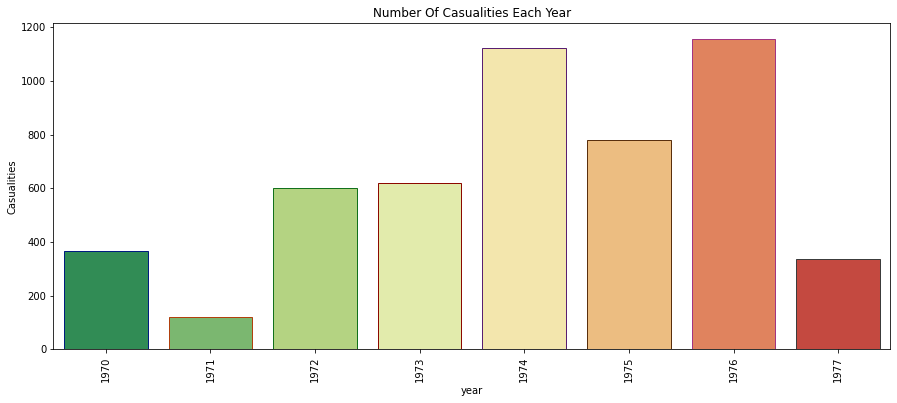

In [37]:
plt.subplots(figsize=(15,6))
year_cas = df.groupby('year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['year','Casualities']
sns.barplot(x=year_cas.year, y=year_cas.Casualities, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

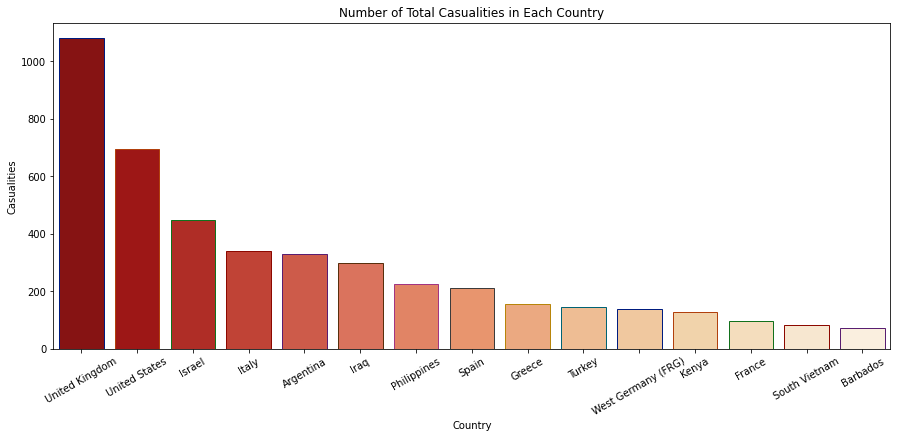

In [38]:
plt.subplots(figsize=(15,6))
count_cas = df.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Casualities in Each Country')
plt.show()

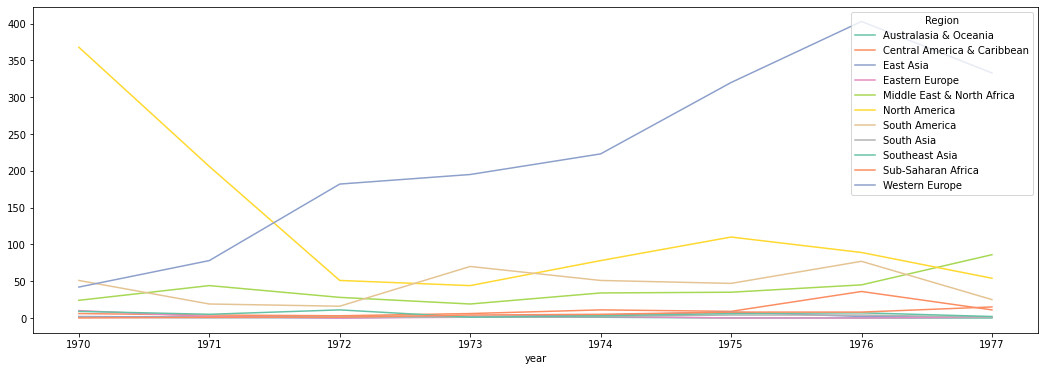

In [39]:
terror_region=pd.crosstab(terror.year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [40]:
#Using plotly for haverables 
figure = px.scatter(terror, x="year", y="Region", color="attacktype",size="nkilled", hover_name="Country", log_x=True, size_max=80, title = "Attack in Countries in each Year")

figure.show()

In [41]:

#Using plotly pie
px.pie(terror, names = "attacktype", values = "nkilled", title = "Percentage of Kills with specific Weapon")

In [42]:
px.pie(terror, names = "targettype", values = "nkilled", title = "Percentage of Kills on the Target")

In [45]:
country_attacks

,Country,Total Attacks
0,United States,1259
1,United Kingdom,1245
2,Italy,368
3,Spain,345
4,Argentina,279
5,West Germany (FRG),225
6,Turkey,222
7,France,178
8,Greece,82
9,Iran,67


In [56]:
fig = px.scatter_geo(terror,lat='lat',lon='lon',color='Region',size='nkilled',title='Hot Zone of Terrorism')

fig.show()

In [61]:
fig=px.density_mapbox(terror,lat='lat',lon='lon',radius=1,z='Region',
                      center=dict(lat=0,lon=180),zoom=1,
                      mapbox_style='stamen-terrain')

fig.show()